<a href="https://colab.research.google.com/github/shjain6670/Deep-Learning-/blob/master/Cricket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cric_df = pd.read_excel('Merged Dataset-Cricket.xlsx')
cric_df.head()

,Team,Match Score,Wickets,Overs,RPO,Inns,Result,Opposition,Ground,Start Date,Margin,BR,Toss,Bat,Rank
0,India,289,3.0,47.3,6.08,2,won,v Australia,Bengaluru,2020-01-19,7 wickets,15.0,lost,2nd,2
1,India,340,6.0,50.0,6.80,1,won,v Australia,Rajkot,2020-01-17,36 runs,NaN,lost,1st,2
2,India,255,NaN,49.1,5.18,1,lost,v Australia,Mumbai,2020-01-14,10 wickets,74.0,lost,1st,2
3,India,352,5.0,50.0,7.04,1,won,v Australia,The Oval,2019-06-09,36 runs,NaN,won,1st,2
4,India,237,NaN,50.0,4.74,2,lost,v Australia,Delhi,2019-03-13,35 runs,NaN,lost,2nd,2


In [2]:
cric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 15 columns):
Team           770 non-null object
Match Score    770 non-null int64
Wickets        518 non-null float64
Overs          770 non-null float64
RPO            770 non-null float64
Inns           770 non-null int64
Result         770 non-null object
Opposition     770 non-null object
Ground         770 non-null object
Start Date     770 non-null datetime64[ns]
Margin         770 non-null object
BR             380 non-null float64
Toss           770 non-null object
Bat            770 non-null object
Rank           770 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(3), object(7)
memory usage: 90.4+ KB


In [3]:
pd.unique(cric_df['Result'])

array(['won', 'lost'], dtype=object)

In [4]:
cric_df.groupby('Result').count()

,Team,Match Score,Wickets,Overs,RPO,Inns,Opposition,Ground,Start Date,Margin,BR,Toss,Bat,Rank
Result,,,,,,,,,,,,,,
lost,385,385,156,385,385,385,385,385,385,385,190,385,385,385
won,385,385,362,385,385,385,385,385,385,385,190,385,385,385


In [0]:
cric_df = cric_df.assign(outcome=(cric_df['Result'] == 'won').astype(int))

In [6]:
cric_df = cric_df.assign(day=cric_df['Start Date'].dt.day,
               month=cric_df['Start Date'].dt.month,
               year=cric_df['Start Date'].dt.year)

cric_df.head()

,Team,Match Score,Wickets,Overs,RPO,Inns,Result,Opposition,Ground,Start Date,Margin,BR,Toss,Bat,Rank,outcome,day,month,year
0,India,289,3.0,47.3,6.08,2,won,v Australia,Bengaluru,2020-01-19,7 wickets,15.0,lost,2nd,2,1,19,1,2020
1,India,340,6.0,50.0,6.80,1,won,v Australia,Rajkot,2020-01-17,36 runs,NaN,lost,1st,2,1,17,1,2020
2,India,255,NaN,49.1,5.18,1,lost,v Australia,Mumbai,2020-01-14,10 wickets,74.0,lost,1st,2,0,14,1,2020
3,India,352,5.0,50.0,7.04,1,won,v Australia,The Oval,2019-06-09,36 runs,NaN,won,1st,2,1,9,6,2019
4,India,237,NaN,50.0,4.74,2,lost,v Australia,Delhi,2019-03-13,35 runs,NaN,lost,2nd,2,0,13,3,2019


In [0]:
cric_df['Wickets'].fillna(0, inplace = True)

In [8]:
cric_df.describe()

,Match Score,Wickets,Overs,RPO,Inns,BR,Rank,outcome,day,month,year
count,770.000000,770.000000,770.000000,770.000000,770.000000,380.000000,770.000000,770.000000,770.000000,770.000000,770.000000
mean,252.815584,3.942857,44.491039,5.678156,1.500000,53.547368,4.689610,0.500000,16.103896,5.594805,2017.093506
std,66.747606,3.364213,7.981388,1.140363,0.500325,56.482424,2.574461,0.500325,8.755581,3.540878,1.513385
min,74.000000,0.000000,8.200000,2.700000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2015.000000
25%,209.250000,0.000000,42.125000,4.890000,1.000000,11.000000,2.000000,0.000000,9.000000,2.000000,2016.000000
50%,255.500000,4.000000,48.300000,5.620000,1.500000,32.000000,4.000000,0.500000,16.000000,6.000000,2017.000000
75%,299.000000,7.000000,50.000000,6.320000,2.000000,78.000000,7.000000,1.000000,24.000000,9.000000,2019.000000
max,481.000000,9.000000,50.000000,14.160000,2.000000,250.000000,9.000000,1.000000,31.000000,12.000000,2020.000000


In [9]:
cric_df['Start Date'].isna().sum()

0

In [10]:
cric_df['BR'].fillna(0, inplace = True)
cric_df.head()

,Team,Match Score,Wickets,Overs,RPO,Inns,Result,Opposition,Ground,Start Date,Margin,BR,Toss,Bat,Rank,outcome,day,month,year
0,India,289,3.0,47.3,6.08,2,won,v Australia,Bengaluru,2020-01-19,7 wickets,15.0,lost,2nd,2,1,19,1,2020
1,India,340,6.0,50.0,6.80,1,won,v Australia,Rajkot,2020-01-17,36 runs,0.0,lost,1st,2,1,17,1,2020
2,India,255,0.0,49.1,5.18,1,lost,v Australia,Mumbai,2020-01-14,10 wickets,74.0,lost,1st,2,0,14,1,2020
3,India,352,5.0,50.0,7.04,1,won,v Australia,The Oval,2019-06-09,36 runs,0.0,won,1st,2,1,9,6,2019
4,India,237,0.0,50.0,4.74,2,lost,v Australia,Delhi,2019-03-13,35 runs,0.0,lost,2nd,2,0,13,3,2019


# Univariate Analysis

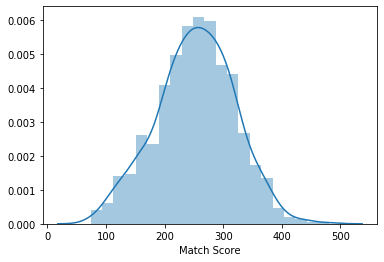

In [11]:
sns.distplot(cric_df['Match Score'])

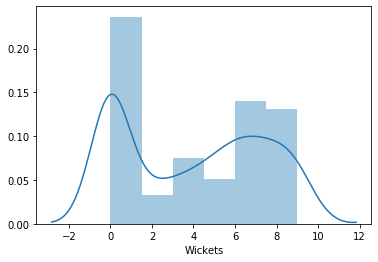

In [12]:
sns.distplot(cric_df['Wickets'])

Distribution of Wickets is not normal

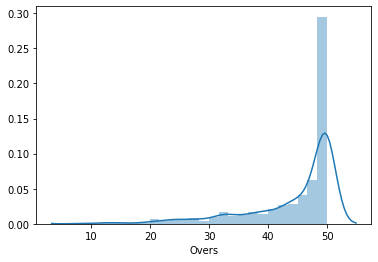

In [13]:
sns.distplot(cric_df['Overs'])

Distribution of Wickets is highly negatively skewed

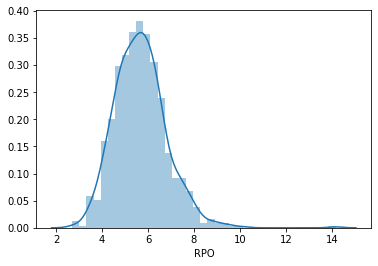

In [14]:
sns.distplot(cric_df['RPO'])

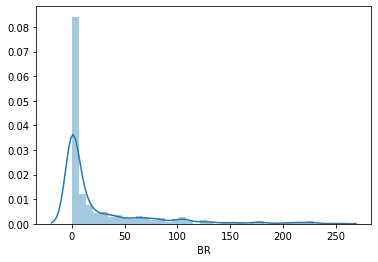

In [15]:
sns.distplot(cric_df['BR'])

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cric_df[['BR', 'Overs']])
cric_df['normalized_BR'], cric_df['normalized_overs'] = zip(*scaler.transform(cric_df[['BR', 'Overs']]))
cric_df.head()

,Team,Match Score,Wickets,Overs,RPO,Inns,Result,Opposition,Ground,Start Date,Margin,BR,Toss,Bat,Rank,outcome,day,month,year,normalized_BR,normalized_overs
0,India,289,3.0,47.3,6.08,2,won,v Australia,Bengaluru,2020-01-19,7 wickets,15.0,lost,2nd,2,1,19,1,2020,-0.238925,0.352168
1,India,340,6.0,50.0,6.80,1,won,v Australia,Rajkot,2020-01-17,36 runs,0.0,lost,1st,2,1,17,1,2020,-0.552586,0.690675
2,India,255,0.0,49.1,5.18,1,lost,v Australia,Mumbai,2020-01-14,10 wickets,74.0,lost,1st,2,0,14,1,2020,0.994806,0.577839
3,India,352,5.0,50.0,7.04,1,won,v Australia,The Oval,2019-06-09,36 runs,0.0,won,1st,2,1,9,6,2019,-0.552586,0.690675
4,India,237,0.0,50.0,4.74,2,lost,v Australia,Delhi,2019-03-13,35 runs,0.0,lost,2nd,2,0,13,3,2019,-0.552586,0.690675


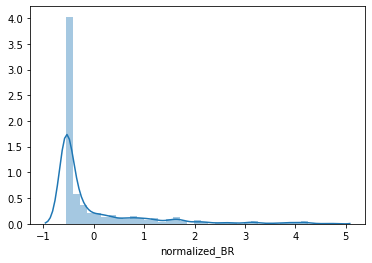

In [17]:
sns.distplot(cric_df['normalized_BR'])

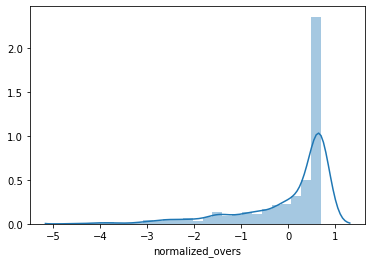

In [18]:
sns.distplot(cric_df['normalized_overs'])

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cric_df[['Match Score', 'RPO']])
cric_df['normalized_match_score'], cric_df['normalized_RPO'] = zip(*scaler.transform(cric_df[['Match Score', 'RPO']]))
cric_df.head()

,Team,Match Score,Wickets,Overs,RPO,Inns,Result,Opposition,Ground,Start Date,Margin,BR,Toss,Bat,Rank,outcome,day,month,year,normalized_BR,normalized_overs,normalized_match_score,normalized_RPO
0,India,289,3.0,47.3,6.08,2,won,v Australia,Bengaluru,2020-01-19,7 wickets,15.0,lost,2nd,2,1,19,1,2020,-0.238925,0.352168,0.542460,0.352612
1,India,340,6.0,50.0,6.80,1,won,v Australia,Rajkot,2020-01-17,36 runs,0.0,lost,1st,2,1,17,1,2020,-0.552586,0.690675,1.307029,0.984400
2,India,255,0.0,49.1,5.18,1,lost,v Australia,Mumbai,2020-01-14,10 wickets,74.0,lost,1st,2,0,14,1,2020,0.994806,0.577839,0.032748,-0.437124
3,India,352,5.0,50.0,7.04,1,won,v Australia,The Oval,2019-06-09,36 runs,0.0,won,1st,2,1,9,6,2019,-0.552586,0.690675,1.486928,1.194996
4,India,237,0.0,50.0,4.74,2,lost,v Australia,Delhi,2019-03-13,35 runs,0.0,lost,2nd,2,0,13,3,2019,-0.552586,0.690675,-0.237100,-0.823216


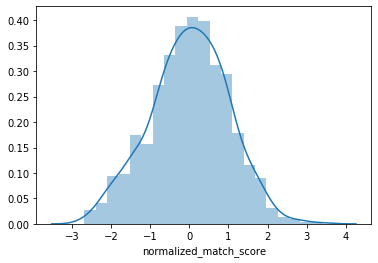

In [20]:
sns.distplot(cric_df['normalized_match_score'])

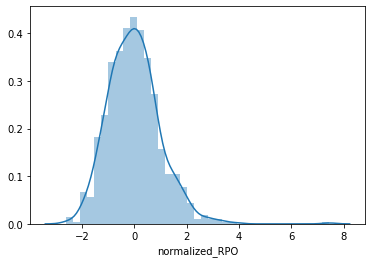

In [21]:
sns.distplot(cric_df['normalized_RPO'])

In [22]:
print(cric_df['normalized_RPO'].quantile([0, 0.05, 0.1, 0.25, 0.5, 0.75,0.90, 0.95, 0.99, 0.995, 1]))

0.000   -2.613283
0.050   -1.447107
0.100   -1.192637
0.250   -0.691594
0.500   -0.051031
0.750    0.563208
0.900    1.249400
0.950    1.708762
0.990    2.749019
0.995    3.213340
1.000    7.442679
Name: normalized_RPO, dtype: float64


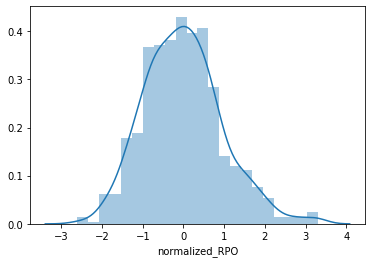

In [23]:
cric_df['normalized_RPO'] = np.where(cric_df['normalized_RPO'] > 3.30, 3.30, cric_df['normalized_RPO']) # Capping
sns.distplot(cric_df['normalized_RPO'])

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(cric_df[['Wickets']])
cric_df['normalized_wickets'] = scaler.transform(cric_df[['Wickets']])
cric_df.head()

,Team,Match Score,Wickets,Overs,RPO,Inns,Result,Opposition,Ground,Start Date,Margin,BR,Toss,Bat,Rank,outcome,day,month,year,normalized_BR,normalized_overs,normalized_match_score,normalized_RPO,normalized_wickets
0,India,289,3.0,47.3,6.08,2,won,v Australia,Bengaluru,2020-01-19,7 wickets,15.0,lost,2nd,2,1,19,1,2020,-0.238925,0.352168,0.542460,0.352612,0.333333
1,India,340,6.0,50.0,6.80,1,won,v Australia,Rajkot,2020-01-17,36 runs,0.0,lost,1st,2,1,17,1,2020,-0.552586,0.690675,1.307029,0.984400,0.666667
2,India,255,0.0,49.1,5.18,1,lost,v Australia,Mumbai,2020-01-14,10 wickets,74.0,lost,1st,2,0,14,1,2020,0.994806,0.577839,0.032748,-0.437124,0.000000
3,India,352,5.0,50.0,7.04,1,won,v Australia,The Oval,2019-06-09,36 runs,0.0,won,1st,2,1,9,6,2019,-0.552586,0.690675,1.486928,1.194996,0.555556
4,India,237,0.0,50.0,4.74,2,lost,v Australia,Delhi,2019-03-13,35 runs,0.0,lost,2nd,2,0,13,3,2019,-0.552586,0.690675,-0.237100,-0.823216,0.000000


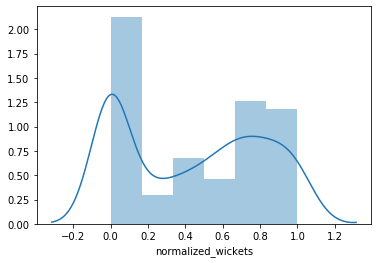

In [25]:
sns.distplot(cric_df['normalized_wickets'])

Try using original wicket feature for the model as there is no change in the distribution

In [0]:
cric_df.to_excel("cric_df2.xlsx")

### Toss and Bat Encoding 

In [27]:
cric_df = cric_df.assign(Toss_Outcome=(cric_df['Toss'] == 'won').astype(int))
cric_df = cric_df.assign(Bat_Inning=(cric_df['Bat'] == '1st').astype(int))
cric_df.head()

,Team,Match Score,Wickets,Overs,RPO,Inns,Result,Opposition,Ground,Start Date,Margin,BR,Toss,Bat,Rank,outcome,day,month,year,normalized_BR,normalized_overs,normalized_match_score,normalized_RPO,normalized_wickets,Toss_Outcome,Bat_Inning
0,India,289,3.0,47.3,6.08,2,won,v Australia,Bengaluru,2020-01-19,7 wickets,15.0,lost,2nd,2,1,19,1,2020,-0.238925,0.352168,0.542460,0.352612,0.333333,0,0
1,India,340,6.0,50.0,6.80,1,won,v Australia,Rajkot,2020-01-17,36 runs,0.0,lost,1st,2,1,17,1,2020,-0.552586,0.690675,1.307029,0.984400,0.666667,0,1
2,India,255,0.0,49.1,5.18,1,lost,v Australia,Mumbai,2020-01-14,10 wickets,74.0,lost,1st,2,0,14,1,2020,0.994806,0.577839,0.032748,-0.437124,0.000000,0,1
3,India,352,5.0,50.0,7.04,1,won,v Australia,The Oval,2019-06-09,36 runs,0.0,won,1st,2,1,9,6,2019,-0.552586,0.690675,1.486928,1.194996,0.555556,1,1
4,India,237,0.0,50.0,4.74,2,lost,v Australia,Delhi,2019-03-13,35 runs,0.0,lost,2nd,2,0,13,3,2019,-0.552586,0.690675,-0.237100,-0.823216,0.000000,0,0


In [28]:
cric_df2 = cric_df.drop(columns = ['Match Score', 'BR', 'Overs', 'RPO', 'Result', 'Margin', 'Toss', 'Bat', 'Start Date'], axis = 1)
cric_df2.head()

,Team,Wickets,Inns,Opposition,Ground,Rank,outcome,day,month,year,normalized_BR,normalized_overs,normalized_match_score,normalized_RPO,normalized_wickets,Toss_Outcome,Bat_Inning
0,India,3.0,2,v Australia,Bengaluru,2,1,19,1,2020,-0.238925,0.352168,0.542460,0.352612,0.333333,0,0
1,India,6.0,1,v Australia,Rajkot,2,1,17,1,2020,-0.552586,0.690675,1.307029,0.984400,0.666667,0,1
2,India,0.0,1,v Australia,Mumbai,2,0,14,1,2020,0.994806,0.577839,0.032748,-0.437124,0.000000,0,1
3,India,5.0,1,v Australia,The Oval,2,1,9,6,2019,-0.552586,0.690675,1.486928,1.194996,0.555556,1,1
4,India,0.0,2,v Australia,Delhi,2,0,13,3,2019,-0.552586,0.690675,-0.237100,-0.823216,0.000000,0,0


In [29]:
cric_df3 = cric_df.drop(columns = ['normalized_BR', 'normalized_overs', 'normalized_match_score', 'normalized_RPO', 'Result', 'normalized_wickets', 'Margin', 'Toss', 'Bat'], axis = 1)
cric_df3.head()

,Team,Match Score,Wickets,Overs,RPO,Inns,Opposition,Ground,Start Date,BR,Rank,outcome,day,month,year,Toss_Outcome,Bat_Inning
0,India,289,3.0,47.3,6.08,2,v Australia,Bengaluru,2020-01-19,15.0,2,1,19,1,2020,0,0
1,India,340,6.0,50.0,6.80,1,v Australia,Rajkot,2020-01-17,0.0,2,1,17,1,2020,0,1
2,India,255,0.0,49.1,5.18,1,v Australia,Mumbai,2020-01-14,74.0,2,0,14,1,2020,0,1
3,India,352,5.0,50.0,7.04,1,v Australia,The Oval,2019-06-09,0.0,2,1,9,6,2019,1,1
4,India,237,0.0,50.0,4.74,2,v Australia,Delhi,2019-03-13,0.0,2,0,13,3,2019,0,0


In [0]:
cric_df2.to_excel('cric_df3.xlsx')
cric_df3.to_excel('cric_df4.xlsx')

# Count Encoding

In [0]:
# Defining  functions that will help us test our encodings
import lightgbm as lgb
from sklearn import metrics

def get_data_splits(dataframe, valid_fraction=0.1):
    valid_fraction = 0.1
    valid_size = int(len(dataframe) * valid_fraction)

    train = dataframe[:-valid_size * 2]
    # valid size == test size, last two sections of the data
    valid = dataframe[-valid_size * 2:-valid_size]
    test = dataframe[-valid_size:]
    
    return train, valid, test

def train_model(train, valid):
    feature_cols = train.columns.drop('outcome')

    dtrain = lgb.Dataset(train[feature_cols], label=train['outcome'])
    dvalid = lgb.Dataset(valid[feature_cols], label=valid['outcome'])

    param = {'num_leaves': 64, 'objective': 'binary', 
             'metric': 'auc', 'seed': 7}
    print("Training model!")
    bst = lgb.train(param, dtrain, num_boost_round=1000, valid_sets=[dvalid], 
                    early_stopping_rounds=10, verbose_eval=False)

    valid_pred = bst.predict(valid[feature_cols])
    valid_score = metrics.roc_auc_score(valid['outcome'], valid_pred)
    print(f"Validation AUC score: {valid_score:.4f}")
    return bst

In [32]:
cric_df2.head()

,Team,Wickets,Inns,Opposition,Ground,Rank,outcome,day,month,year,normalized_BR,normalized_overs,normalized_match_score,normalized_RPO,normalized_wickets,Toss_Outcome,Bat_Inning
0,India,3.0,2,v Australia,Bengaluru,2,1,19,1,2020,-0.238925,0.352168,0.542460,0.352612,0.333333,0,0
1,India,6.0,1,v Australia,Rajkot,2,1,17,1,2020,-0.552586,0.690675,1.307029,0.984400,0.666667,0,1
2,India,0.0,1,v Australia,Mumbai,2,0,14,1,2020,0.994806,0.577839,0.032748,-0.437124,0.000000,0,1
3,India,5.0,1,v Australia,The Oval,2,1,9,6,2019,-0.552586,0.690675,1.486928,1.194996,0.555556,1,1
4,India,0.0,2,v Australia,Delhi,2,0,13,3,2019,-0.552586,0.690675,-0.237100,-0.823216,0.000000,0,0


In [34]:
!pip install category_encoders

     |████████████████████████████████| 102kB 2.9MB/s 


In [0]:
import category_encoders as ce
cat_features = ['Team', 'Opposition', 'Ground']
count_enc = ce.CountEncoder()
count_encoded = count_enc.fit_transform(cric_df[cat_features])

data_cols1 = ['Wickets', 'Inns', 'day', 'month', 'year', 'outcome', 'Rank', 'normalized_BR', 'normalized_overs', 'normalized_match_score', 'normalized_RPO', 'Toss_Outcome', 'Bat_Inning']
data_cols2 = ['Wickets', 'Inns', 'day', 'month', 'year', 'outcome', 'Rank', 'BR', 'Overs', 'Match Score', 'RPO', 'Toss_Outcome', 'Bat_Inning']
Trans_data1 = cric_df2[data_cols1].join(count_encoded)
Trans_data2 = cric_df3[data_cols2].join(count_encoded)

In [36]:
Trans_data1.head()

,Wickets,Inns,day,month,year,outcome,Rank,normalized_BR,normalized_overs,normalized_match_score,normalized_RPO,Toss_Outcome,Bat_Inning,Team,Opposition,Ground
0,3.0,2,19,1,2020,1,2,-0.238925,0.352168,0.542460,0.352612,0,0,103,93,4
1,6.0,1,17,1,2020,1,2,-0.552586,0.690675,1.307029,0.984400,0,1,103,93,4
2,0.0,1,14,1,2020,0,2,0.994806,0.577839,0.032748,-0.437124,0,1,103,93,6
3,5.0,1,9,6,2019,1,2,-0.552586,0.690675,1.486928,1.194996,1,1,103,93,28
4,0.0,2,13,3,2019,0,2,-0.552586,0.690675,-0.237100,-0.823216,0,0,103,93,4


In [37]:
Trans_data2.head()

,Wickets,Inns,day,month,year,outcome,Rank,BR,Overs,Match Score,RPO,Toss_Outcome,Bat_Inning,Team,Opposition,Ground
0,3.0,2,19,1,2020,1,2,15.0,47.3,289,6.08,0,0,103,93,4
1,6.0,1,17,1,2020,1,2,0.0,50.0,340,6.80,0,1,103,93,4
2,0.0,1,14,1,2020,0,2,74.0,49.1,255,5.18,0,1,103,93,6
3,5.0,1,9,6,2019,1,2,0.0,50.0,352,7.04,1,1,103,93,28
4,0.0,2,13,3,2019,0,2,0.0,50.0,237,4.74,0,0,103,93,4


In [38]:
Trans_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 16 columns):
Wickets         770 non-null float64
Inns            770 non-null int64
day             770 non-null int64
month           770 non-null int64
year            770 non-null int64
outcome         770 non-null int64
Rank            770 non-null int64
BR              770 non-null float64
Overs           770 non-null float64
Match Score     770 non-null int64
RPO             770 non-null float64
Toss_Outcome    770 non-null int64
Bat_Inning      770 non-null int64
Team            770 non-null int64
Opposition      770 non-null int64
Ground          770 non-null int64
dtypes: float64(4), int64(12)
memory usage: 96.4 KB


In [39]:
# Training a model on the Trans_data1
train1, valid1, test1 = get_data_splits(Trans_data1)
bst1 = train_model(train1, valid1)

Training model!
Validation AUC score: 0.9697


In [40]:
# Training a model on the Trans_data1
train2, valid2, test2 = get_data_splits(Trans_data2)
bst2 = train_model(train2, valid2)

Training model!
Validation AUC score: 0.9697


# Feature Generation

In [0]:
cric_df2.head()

,Team,Wickets,Inns,Opposition,Ground,Rank,outcome,day,month,year,normalized_BR,normalized_overs,normalized_match_score,normalized_RPO,normalized_wickets,Toss_Outcome,Bat_Inning
0,India,3.0,2,v Australia,Bengaluru,2,1,19,1,2020,-0.238925,0.352168,0.542460,0.352612,0.333333,0,0
1,India,6.0,1,v Australia,Rajkot,2,1,17,1,2020,-0.552586,0.690675,1.307029,0.984400,0.666667,0,1
2,India,0.0,1,v Australia,Mumbai,2,0,14,1,2020,0.994806,0.577839,0.032748,-0.437124,0.000000,0,1
3,India,5.0,1,v Australia,The Oval,2,1,9,6,2019,-0.552586,0.690675,1.486928,1.194996,0.555556,1,1
4,India,0.0,2,v Australia,Delhi,2,0,13,3,2019,-0.552586,0.690675,-0.237100,-0.823216,0.000000,0,0


In [41]:
from sklearn.preprocessing import LabelEncoder

interactions = cric_df3['Opposition'] + "_" + cric_df3['Ground']
print(interactions.head(10))

0             v Australia_Bengaluru
1                v Australia_Rajkot
2                v Australia_Mumbai
3              v Australia_The Oval
4                 v Australia_Delhi
5                v Australia_Mohali
6                v Australia_Ranchi
7                v Australia_Nagpur
8    v Australia_Hyderabad (Deccan)
9             v Australia_Melbourne
dtype: object


In [42]:
label_enc = LabelEncoder()
data_interaction = Trans_data2.assign(Opposition_Ground=label_enc.fit_transform(interactions))
data_interaction.head()

,Wickets,Inns,day,month,year,outcome,Rank,BR,Overs,Match Score,RPO,Toss_Outcome,Bat_Inning,Team,Opposition,Ground,Opposition_Ground
0,3.0,2,19,1,2020,1,2,15.0,47.3,289,6.08,0,0,103,93,4,4
1,6.0,1,17,1,2020,1,2,0.0,50.0,340,6.80,0,1,103,93,4,37
2,0.0,1,14,1,2020,0,2,74.0,49.1,255,5.18,0,1,103,93,6,30
3,5.0,1,9,6,2019,1,2,0.0,50.0,352,7.04,1,1,103,93,28,43
4,0.0,2,13,3,2019,0,2,0.0,50.0,237,4.74,0,0,103,93,4,16


In [43]:
interactions2 = cric_df3['Team'] + "_" + cric_df3['Ground']
label_enc = LabelEncoder()
data_interaction2 = data_interaction.assign(Team_Ground=label_enc.fit_transform(interactions2))
data_interaction2.head()

,Wickets,Inns,day,month,year,outcome,Rank,BR,Overs,Match Score,RPO,Toss_Outcome,Bat_Inning,Team,Opposition,Ground,Opposition_Ground,Team_Ground
0,3.0,2,19,1,2020,1,2,15.0,47.3,289,6.08,0,0,103,93,4,4,116
1,6.0,1,17,1,2020,1,2,0.0,50.0,340,6.80,0,1,103,93,4,37,156
2,0.0,1,14,1,2020,0,2,74.0,49.1,255,5.18,0,1,103,93,6,30,145
3,5.0,1,9,6,2019,1,2,0.0,50.0,352,7.04,1,1,103,93,28,43,160
4,0.0,2,13,3,2019,0,2,0.0,50.0,237,4.74,0,0,103,93,4,16,126


In [44]:
interactions3 = cric_df3['Team'] + "_" + cric_df3['Opposition']
label_enc = LabelEncoder()
data_interaction3 = data_interaction2.assign(Team_Opposition=label_enc.fit_transform(interactions3))
data_interaction3.head()

,Wickets,Inns,day,month,year,outcome,Rank,BR,Overs,Match Score,RPO,Toss_Outcome,Bat_Inning,Team,Opposition,Ground,Opposition_Ground,Team_Ground,Team_Opposition
0,3.0,2,19,1,2020,1,2,15.0,47.3,289,6.08,0,0,103,93,4,4,116,24
1,6.0,1,17,1,2020,1,2,0.0,50.0,340,6.80,0,1,103,93,4,37,156,24
2,0.0,1,14,1,2020,0,2,74.0,49.1,255,5.18,0,1,103,93,6,30,145,24
3,5.0,1,9,6,2019,1,2,0.0,50.0,352,7.04,1,1,103,93,28,43,160,24
4,0.0,2,13,3,2019,0,2,0.0,50.0,237,4.74,0,0,103,93,4,16,126,24


In [45]:
# First, create a Series with a timestamp index
match_date = pd.Series(cric_df3.index, index=cric_df3['Start Date'], name="match_7_days").sort_index()
match_date.head(20)

Start Date
2015-01-11    485
2015-01-11    681
2015-01-15    484
2015-01-15    680
2015-01-16    148
2015-01-16    741
2015-01-16    284
2015-01-16    564
2015-01-18    563
2015-01-18     23
2015-01-18    740
2015-01-18    126
2015-01-20    483
2015-01-20    679
2015-01-20     40
2015-01-20    262
2015-01-21    562
2015-01-21    739
2015-01-23    147
2015-01-23    678
Name: match_7_days, dtype: int64

In [0]:
from pandas.plotting import register_matplotlib_converters

Start Date
2015-01-11     0.0
2015-01-11     1.0
2015-01-15     2.0
2015-01-15     3.0
2015-01-16     4.0
2015-01-16     5.0
2015-01-16     6.0
2015-01-16     7.0
2015-01-18     6.0
2015-01-18     7.0
2015-01-18     8.0
2015-01-18     9.0
2015-01-20    10.0
2015-01-20    11.0
2015-01-20    12.0
2015-01-20    13.0
2015-01-21    14.0
2015-01-21    15.0
2015-01-23    10.0
2015-01-23    11.0
Name: match_7_days, dtype: float64


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


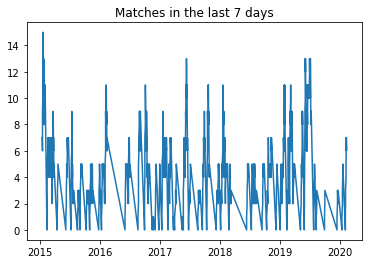

In [47]:
matches_7_days = match_date.rolling('7d').count() - 1
print(matches_7_days.head(20))

# Ignore records with broken launch dates
plt.plot(matches_7_days[7:]);
plt.title("Matches in the last 7 days");

In [0]:
matches_7_days.index = match_date.values
matches_7_days = matches_7_days.reindex(cric_df3.index)

In [49]:
matches_7_days.head(10)

0     4.0
1     3.0
2     0.0
3    10.0
4     8.0
5     7.0
6    11.0
7     8.0
8     2.0
9     5.0
Name: match_7_days, dtype: float64

In [0]:
data_interaction3 = data_interaction3.join(matches_7_days)

In [0]:
data_interaction3.to_excel("data_interaction3.xlsx")

# Feature Selection

In [52]:
from sklearn.feature_selection import SelectKBest, f_classif

feature_cols = data_interaction3.columns.drop('outcome')
train, valid, _ = get_data_splits(data_interaction3)

# Keep 5 features
selector = SelectKBest(f_classif, k=8)
selector2 = SelectKBest(f_classif, k=5)
X_new = selector.fit_transform(train[feature_cols], train['outcome'])
X_new2 = selector2.fit_transform(train[feature_cols], train['outcome'])
X_new

array([[  3.,   2., 289., ...,  93.,   4., 116.],
       [  6.,   2., 340., ...,  93.,  37., 156.],
       [  0.,   2., 255., ...,  93.,  30., 145.],
       ...,
       [  0.,   8., 226., ...,  93.,  15., 283.],
       [  0.,   8., 288., ...,  93.,  14., 281.],
       [  8.,   8., 227., ...,  93.,  14., 281.]])

In [53]:
X_new2

array([[  3.  ,   2.  , 289.  ,   6.08, 103.  ],
       [  6.  ,   2.  , 340.  ,   6.8 , 103.  ],
       [  0.  ,   2.  , 255.  ,   5.18, 103.  ],
       ...,
       [  0.  ,   8.  , 226.  ,   4.58,  88.  ],
       [  0.  ,   8.  , 288.  ,   5.89,  88.  ],
       [  8.  ,   8.  , 227.  ,   4.54,  88.  ]])

In [54]:
# Get back the features we've kept, zero out all other features
selected_features = pd.DataFrame(selector.inverse_transform(X_new), 
                                 index=train.index, 
                                 columns=feature_cols)
selected_features.head()

,Wickets,Inns,day,month,year,Rank,BR,Overs,Match Score,RPO,Toss_Outcome,Bat_Inning,Team,Opposition,Ground,Opposition_Ground,Team_Ground,Team_Opposition,match_7_days
0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,289.0,6.08,0.0,0.0,103.0,93.0,0.0,4.0,116.0,0.0,0.0
1,6.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,340.0,6.80,0.0,0.0,103.0,93.0,0.0,37.0,156.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,255.0,5.18,0.0,0.0,103.0,93.0,0.0,30.0,145.0,0.0,0.0
3,5.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,352.0,7.04,0.0,0.0,103.0,93.0,0.0,43.0,160.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,237.0,4.74,0.0,0.0,103.0,93.0,0.0,16.0,126.0,0.0,0.0


In [56]:
selected_features2 = pd.DataFrame(selector2.inverse_transform(X_new2), 
                                 index=train.index, 
                                 columns=feature_cols)
selected_features2.head()

,Wickets,Inns,day,month,year,Rank,BR,Overs,Match Score,RPO,Toss_Outcome,Bat_Inning,Team,Opposition,Ground,Opposition_Ground,Team_Ground,Team_Opposition,match_7_days
0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,289.0,6.08,0.0,0.0,103.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,340.0,6.80,0.0,0.0,103.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,255.0,5.18,0.0,0.0,103.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,352.0,7.04,0.0,0.0,103.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,237.0,4.74,0.0,0.0,103.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
# Dropped columns have values of all 0s, so var is 0, drop them
selected_columns = selected_features.columns[selected_features.var() != 0]

# Get the valid dataset with the selected features.
valid[selected_columns].head()

,Wickets,Rank,Match Score,RPO,Team,Opposition,Opposition_Ground,Team_Ground
616,0.0,8,312,6.73,88,93,41,302
617,9.0,8,232,4.64,88,97,97,294
618,6.0,8,366,7.32,88,97,86,281
619,7.0,8,273,5.46,88,97,104,299
620,9.0,8,150,7.14,88,97,104,299


In [58]:
selected_columns2 = selected_features2.columns[selected_features2.var() != 0]

# Get the valid dataset with the selected features.
valid[selected_columns2].head()

,Wickets,Rank,Match Score,RPO,Team
616,0.0,8,312,6.73,88
617,9.0,8,232,4.64,88
618,6.0,8,366,7.32,88
619,7.0,8,273,5.46,88
620,9.0,8,150,7.14,88


In [64]:
data_interaction3.head()

,Wickets,Inns,day,month,year,outcome,Rank,BR,Overs,Match Score,RPO,Toss_Outcome,Bat_Inning,Team,Opposition,Ground,Opposition_Ground,Team_Ground,Team_Opposition,match_7_days
0,3.0,2,19,1,2020,1,2,15.0,47.3,289,6.08,0,0,103,93,4,4,116,24,4.0
1,6.0,1,17,1,2020,1,2,0.0,50.0,340,6.80,0,1,103,93,4,37,156,24,3.0
2,0.0,1,14,1,2020,0,2,74.0,49.1,255,5.18,0,1,103,93,6,30,145,24,0.0
3,5.0,1,9,6,2019,1,2,0.0,50.0,352,7.04,1,1,103,93,28,43,160,24,10.0
4,0.0,2,13,3,2019,0,2,0.0,50.0,237,4.74,0,0,103,93,4,16,126,24,8.0


In [0]:
dataset1 = data_interaction3[['Wickets', 'Rank', 'Match Score', 'RPO', 'Team', 'outcome']]
dataset2 = data_interaction3[['Wickets', 'Rank', 'Match Score', 'RPO', 'Team', 'Opposition', 'Opposition_Ground', 'Team_Ground', 'outcome']]

In [0]:
dataset1.to_excel('dataset1.xlsx')
dataset2.to_excel('dataset2.xlsx')

## L1 regularization

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

train, valid, _ = get_data_splits(data_interaction3)

X, y = train[train.columns.drop("outcome")], train['outcome']

# Set the regularization parameter C=1
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver = 'liblinear'))
sel_.fit(X, y)

sel_.get_support()

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [69]:
selected_feat = X.columns[(sel_.get_support())]
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 19
selected features: 18
features with coefficients shrank to zero: 1


In [70]:
removed_feats = X.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index(['Inns'], dtype='object')

In [0]:
dataset3 = data_interaction3.drop(columns=['Inns'], axis = 1)

In [72]:
dataset3.head()

,Wickets,day,month,year,outcome,Rank,BR,Overs,Match Score,RPO,Toss_Outcome,Bat_Inning,Team,Opposition,Ground,Opposition_Ground,Team_Ground,Team_Opposition,match_7_days
0,3.0,19,1,2020,1,2,15.0,47.3,289,6.08,0,0,103,93,4,4,116,24,4.0
1,6.0,17,1,2020,1,2,0.0,50.0,340,6.80,0,1,103,93,4,37,156,24,3.0
2,0.0,14,1,2020,0,2,74.0,49.1,255,5.18,0,1,103,93,6,30,145,24,0.0
3,5.0,9,6,2019,1,2,0.0,50.0,352,7.04,1,1,103,93,28,43,160,24,10.0
4,0.0,13,3,2019,0,2,0.0,50.0,237,4.74,0,0,103,93,4,16,126,24,8.0


In [73]:
dataset1.head()

,Wickets,Rank,Match Score,RPO,Team,outcome
0,3.0,2,289,6.08,103,1
1,6.0,2,340,6.80,103,1
2,0.0,2,255,5.18,103,0
3,5.0,2,352,7.04,103,1
4,0.0,2,237,4.74,103,0


In [74]:
dataset2.head()

,Wickets,Rank,Match Score,RPO,Team,Opposition,Opposition_Ground,Team_Ground,outcome
0,3.0,2,289,6.08,103,93,4,116,1
1,6.0,2,340,6.80,103,93,37,156,1
2,0.0,2,255,5.18,103,93,30,145,0
3,5.0,2,352,7.04,103,93,43,160,1
4,0.0,2,237,4.74,103,93,16,126,0
